In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def rename_cols(dataframe,building): 
    dataframe.rename(columns = {"kWh": str(building+"_kWh"),"kW": str(building + "_kW")},inplace = True)
    dataframe.head()

In [3]:
def assert_string(dataframe):
    print(type(dataframe["Read Date"][0]).__name__)
    assert(type(dataframe["Read Date"][0]).__name__=="str")

In [4]:
def add_name(dataframe,building):
    dataframe['building'] = building

In [5]:
def plot_daily_data(dataframe): 
    day = [i for i in range(len(dataframe))]
    plt.bar(day,dataframe.iloc[:,2])
    plt.show()

In [6]:
olin = pd.read_csv("olin_daily.csv")
rename_cols(olin,"olin")
day = [i for i in range(len(olin['Read Date']))]
olin = olin[olin.olin_kW.notnull()]
olin

,Read Date,olin_kWh,olin_kW
0,1/1/2020 12:00:00 AM,662.0000,28.8
1,1/2/2020 12:00:00 AM,679.4000,32.8
2,1/4/2020 12:00:00 AM,660.2000,28.8
3,1/5/2020 12:00:00 AM,668.6000,28.8
4,1/6/2020 12:00:00 AM,679.0000,32.0
...,...,...,...
816,4/29/2021 12:00:00 AM,"2,618.6001",132.8
818,4/30/2021 12:00:00 AM,"2,341.2000",108.8
820,5/1/2021 12:00:00 AM,"2,118.3999",104.0
822,5/2/2021 12:00:00 AM,"2,290.3999",106.4


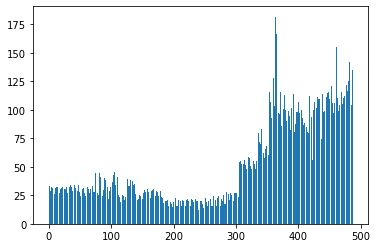

In [7]:
plot_daily_data(olin)

In [8]:
old_centre = pd.read_csv("old_centre_daily.csv")
rename_cols(old_centre,"old_centre")
old_centre = old_centre[old_centre.old_centre_kW.notnull()]
old_centre = old_centre[181:]
old_centre

,Read Date,old_centre_kWh,old_centre_kW
208,7/1/2020 12:00:00 AM,"1,234.3400",64.80
210,7/2/2020 12:00:00 AM,"1,293.6000",69.52
212,7/3/2020 12:00:00 AM,"1,198.1200",60.00
214,7/4/2020 12:00:00 AM,"1,217.4399",60.80
216,7/5/2020 12:00:00 AM,"1,229.1000",60.00
...,...,...,...
812,4/29/2021 12:00:00 AM,986.3800,60.00
814,4/30/2021 12:00:00 AM,970.1800,56.00
816,5/1/2021 12:00:00 AM,838.9800,50.40
818,5/2/2021 12:00:00 AM,833.9600,45.60


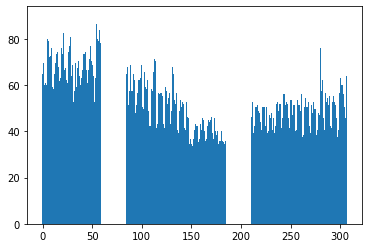

In [9]:
plot_daily_data(old_centre)

In [10]:
assert_string(olin)

str


In [11]:
pearl = pd.read_csv("pearl_daily.csv")
rename_cols(pearl,"pearl")
pearl = pearl[pearl.pearl_kW.notnull()]
pearl

,Read Date,pearl_kWh,pearl_kW
0,1/1/2020 12:00:00 AM,"1,439.9760",80.640
1,1/2/2020 12:00:00 AM,"1,325.8080",68.064
2,1/4/2020 12:00:00 AM,"1,340.0880",71.040
3,1/5/2020 12:00:00 AM,"1,432.7040",69.120
4,1/6/2020 12:00:00 AM,"1,570.9921",101.760
...,...,...,...
816,4/29/2021 12:00:00 AM,"1,966.9440",124.800
818,4/30/2021 12:00:00 AM,"1,736.1121",128.640
820,5/1/2021 12:00:00 AM,"1,674.6960",127.680
822,5/2/2021 12:00:00 AM,"1,760.7360",107.520


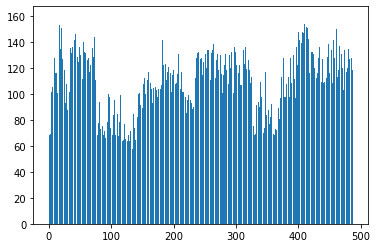

In [12]:
plot_daily_data(pearl)

In [13]:
jvac = pd.read_csv("jvac_daily.csv")
rename_cols(jvac,"jvac")
jvac = jvac[jvac.jvac_kWh > 2]
jvac

,Read Date,jvac_kWh,jvac_kW
0,1/1/2020 12:00:00 AM,385.80,29.6
1,1/2/2020 12:00:00 AM,343.20,21.6
2,1/4/2020 12:00:00 AM,346.00,18.4
3,1/5/2020 12:00:00 AM,351.40,18.4
4,1/6/2020 12:00:00 AM,415.80,24.8
...,...,...,...
876,4/29/2021 12:00:00 AM,829.54,NaN
879,4/30/2021 12:00:00 AM,482.60,NaN
882,5/1/2021 12:00:00 AM,376.80,NaN
885,5/2/2021 12:00:00 AM,391.60,NaN


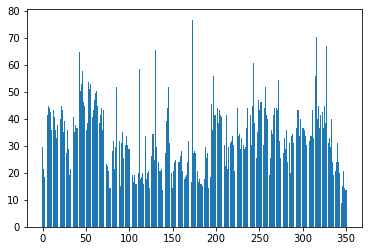

In [14]:
plot_daily_data(jvac)

In [15]:
warehouse = pd.read_csv("warehouse_daily.csv")
rename_cols(warehouse,"warehouse")
warehouse = warehouse[warehouse.warehouse_kWh > str(2)]
warehouse

,Read Date,warehouse_kWh,warehouse_kW
0,1/1/2020 12:00:00 AM,431.9640,24.432
1,1/2/2020 12:00:00 AM,441.0360,23.040
2,1/3/2020 12:00:00 AM,"2,474.0039",397.920
3,1/4/2020 12:00:00 AM,435.3600,28.800
4,1/5/2020 12:00:00 AM,432.3120,22.080
...,...,...,...
817,4/29/2021 12:00:00 AM,486.7320,45.120
819,4/30/2021 12:00:00 AM,369.5760,32.160
821,5/1/2021 12:00:00 AM,418.9200,31.680
823,5/2/2021 12:00:00 AM,420.8400,35.520


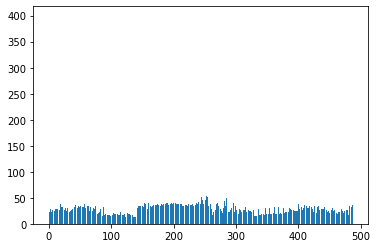

In [16]:
plot_daily_data(warehouse)

In [17]:
joined = pd.merge(crounse,warehouse)
assert_string(joined)

NameError: name 'crounse' is not defined

In [ ]:
new_join = pd.merge(joined,olin,how="outer")
new_join

In [ ]:
final_join = pd.merge(new_join,old_centre,how="outer")
final_join

In [ ]:
new = pd.merge(jvac,joined)
new.head()